# Projeto 3- Ciência dos Dados 

### Daniel Ruhman e Eduardo Gebara

#### Introdução

Esse projeto tem como objetivo analisar a relação entre uma variável dependente (resposta), que no caso é o índice Mortalidade Infantil em países, e duas variáveis independentes (PIB per capita e IDH). Para nossa análise, utilizamos o modelo de regressão linear multipla a partir do método dos minimos quadrados (MMQ) que resulta em uma equação do plano gerado (lembrando que o gráfico é 3D, já que são 3 eixos). Dessa forma, nosso objetivo é analisar com ferramentas estatístisticas a relação das 3 variáveis, afim de chegar a conclusões para nosso projeto. 

In [2]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/eduardogebara/Desktop/CD-master/Projeto3


Abaixo temos todo o processo de leitura e limpeza dos dados retirados do arquivo xlsx. 

# FION COMPLETAA ESSE MARKDOWN TMJ

In [3]:
mortalidade = pd.read_excel('indicatorgapminderunder5mortality.xlsx',index_col=0)

In [4]:
mortalidade.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Under five mortality,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,469.98,469.98,...,116.3,113.2,110.4,107.6,105.0,102.3,99.5,96.7,93.9,91.1
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,...,19.5,18.7,17.9,17.3,16.6,16.0,15.5,14.9,14.4,14.0
Algeria,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,...,32.1,30.7,29.5,28.4,27.4,26.6,25.8,25.2,24.6,24.0


In [5]:
hdi = pd.read_excel('Indicator_HDI.xlsx',index_col=0)

In [6]:
hdi.head()

,1980,1990,2000,2005,2006,2007,2008,2009,2011
HDI,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,0.198,0.246,0.230,0.340,0.354,0.363,0.370,0.387,0.398
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,0.656,0.691,0.721,0.724,0.729,0.733,0.734,0.739
Algeria,0.454,0.551,0.624,0.667,0.673,0.680,0.686,0.691,0.698


In [7]:
pib = pd.read_excel('GDPpercapitaconstant2000US.xlsx',index_col=0)

In [8]:
pib.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Income per person (fixed 2000 US$),,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1313.722725,1381.040832,1454.022854,1525.723589,1594.495067,1681.613910,1804.419415,1857.352947,1915.424459,1965.707230
Algeria,1280.384828,1085.414612,855.947986,1128.41578,1170.323896,1215.015783,1127.614288,1200.558225,1291.863983,1359.491003,...,1871.921986,1971.512803,2043.135713,2115.186028,2124.957754,2155.485231,2173.787903,2192.703976,2231.980246,2255.225482


In [9]:
mortalidade.shape

(275, 216)

In [10]:
mortalidade=mortalidade[~np.isnan(mortalidade[2011])]
mortalidade.shape

(211, 216)

In [11]:
hdi.shape

(270, 9)

In [12]:
hdi=hdi[~np.isnan(hdi[2011])]
hdi.shape

(187, 9)

In [13]:
pib.shape

(275, 52)

In [14]:
pib=pib[~np.isnan(pib["2011"])]
pib.shape

(175, 52)

In [15]:
dados = pd.DataFrame()
dados["Mortalidade"] = mortalidade[2011]
dados["Pib/C"] = pib["2011"]
dados["HDI"] = hdi[2011]
dados.shape

(211, 3)

In [16]:
dados=dados[~np.isnan(dados.Mortalidade)]
dados=dados[~np.isnan(dados["Pib/C"])]
dados=dados[~np.isnan(dados.HDI)]
dados.shape

(171, 3)

In [17]:
dados.head()

,Mortalidade,Pib/C,HDI
Under five mortality,,,
Albania,16.0,1965.707230,0.739
Algeria,26.6,2255.225482,0.698
Angola,177.3,629.955306,0.486
Antigua and Barbuda,9.5,9977.957073,0.764
Argentina,14.2,11601.630223,0.797


Abaixo serão plotados dois gráficos de dispersão, um mostrando a mortalidade em função do PIB per capita e outro mostrando a mortalidade em função do IDH (índice de desenvolvimento humano). Vale ressaltar que para linealizar o modelo, fizemos o log na base _e_ do PIB per capita. Com isso, podemos tranquilamente aproximar cada um dois gráfico por um modelo de regressão linear simples. 

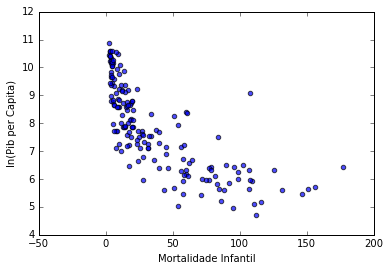

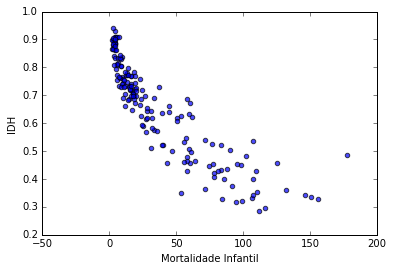

In [18]:
plt.scatter(dados["Mortalidade"],np.log(dados["Pib/C"]), alpha=0.7) 
plt.ylabel("ln(Pib per Capita)")
plt.xlabel("Mortalidade Infantil")
plt.show()

plt.scatter(dados["Mortalidade"],dados["HDI"], alpha=0.7)
plt.ylabel("IDH")
plt.xlabel("Mortalidade Infantil")
plt.show()


Abaixo calculamos o coeficiente de correlação de Pearson (r), que varia de -1 até 1, sendo -1 e 1 indicadores de uma perfeita correlação entre duas variáveis. Se r=0 dizemos que uma variável não depende linearmente da outra. Vale ressaltar que a correlação de duas variáveis iguais é 1, ou seja, uma perfeita correlação. Esse coeficiente mede a "força" ou grau de relação de duas variáveis.

In [23]:
dados.corr(method='pearson')

,Mortalidade,Pib/C,HDI
Mortalidade,1.000000,-0.496680,-0.877618
Pib/C,-0.496680,1.000000,0.693445
HDI,-0.877618,0.693445,1.000000


A partir dos dados acima, podemos concluir que mortalidade e PIB possuem uma correlação moderada negativa (-0,49668). Além disso, podemos concluir que Mortalidade e IDH possuem forte correlação negativa (-0,877618), indicando que essas variáveis são fortemente relacionadas. Os valores de r são negativos, pois na medida que as variáveis IDH e PIB aumentam, a variável mortalidade diminui. 

In [20]:
y=dados.Mortalidade
X=dados.iloc[:,(1,2)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Mortalidade   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     324.4
Date:                Mon, 05 Dec 2016   Prob (F-statistic):           2.02e-58
Time:                        16:22:13   Log-Likelihood:                -729.09
No. Observations:                 171   AIC:                             1464.
Df Residuals:                     168   BIC:                             1474.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        179.5968      6.332     28.362      0.000       167.096   192.098
Pib/C          0.0008      0.000      4.439      0.000         0.000     0.001
HDI         -224.1058     10.596    -21.151      0.000      -245.024  -203.188
==============================================================================
Omnibus:                       84.399   Durbin-Watson:                   2.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              567.069
Skew:                           1.683   Prob(JB):                    7.29e-124
Kurtosis:                      11.262   Cond. No.                     1.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Análise de Regressão

Após a análise de correlação entre variaveis, foi feita uma análise de regressão, que estuda a relação entre 1 variável dependente e outras variáveis independentes (no nosso caso, duas), sendo que se for apenas uma variável independente chamamos de regressão linear simples e se forem mais chamamos de regressão linear múltipla. A relação entre as variáveis se dar por meio de um modelo matemático, ou seja, por uma equação que define uma relação linear entre as variáveis. 
Como não possuimos os parametros reais do sistema, precisamos estimá-los e para isso utilizamos o método dos mínimos quadrados. O objetivo é escolher beta_chapéu0, beta_chapéu1 e beta_chapéu2 (parâmetros estimados) de modo a minimizar a soma dos quadrados dos residuos (erros). 

Algo importante que a tabela nos dá é o valor de Rˆ2, que representa em porcentagem a proporção de variabilidade da variável resposta que é explicada pelo modelo de regressão linear. O Rˆ2 acima indica que 79,4% da variabilidade de Mortalidade Infantil é explicada pelos regressores presentes no modelo. Vale ressaltar que para regressões lineares multiplas, normalmente utilizamos o R^2 ajustado, que leva em conta o número de variáveis independentes, já que Rˆ2 tende a aumentar conforme incluimos mais variáveis independentes no sistema. Logo, para impedir esse aumento indesejado, utilizamos o coeficiente de determinação ajustado (Adj. R-squared) que no caso é de 0,792 (72,9%). É importante frisar que os resultados de Rˆ2 e Rˆ2 ajustados obtidos implicam em uma boa qualidade de ajuste. 

In [21]:
X

,const,Pib/C,HDI
Under five mortality,,,
Albania,1,1965.707230,0.739
Algeria,1,2255.225482,0.698
Angola,1,629.955306,0.486
Antigua and Barbuda,1,9977.957073,0.764
Argentina,1,11601.630223,0.797
Armenia,1,1384.085162,0.716
Australia,1,25306.824938,0.929
Austria,1,27266.403350,0.885
Azerbaijan,1,2338.896558,0.731


In [22]:
#Teste de White
#ver link https://pt.wikipedia.org/wiki/Teste_de_White
#y estimados
y_hat = fit.predict(X)

#Resíduos quadráticos
res2=(y-y_hat)**2

sm1.stats.diagnostic.het_white(res2,X)

(2.8772660000026584,
 0.71890092343776357,
 0.56476465580252366,
 0.72690368287145801)